In [1]:
import pandas, numpy
import matplotlib.pyplot as plt

In [2]:
spiders_agns_data = pandas.read_csv('spiders_with_vi.csv')
spiders_agns_data.head()

,xray_detection,name,RA,DEC,ExpTime,ExiML_2RXS,DETML_XMMSL,f_2RXS,errf_2RXS,fden_2RXS,...,errlogBHMA_hb,l_edd1,l_edd2,edd_ratio1,edd_ratio2,broad_Hb_fwhm_vi,narrow_Hb_fwhm_vi,narrow_OIII_A_vi,narrow_Hb_A_vi,Log(OIII/Hb)_vi
0,2RXS,2RXS J131703.4-021538,199.26434,-2.26066,273.86,161.0,-99.0,8.035261e-12,7.752275e-13,2.811901e-30,...,0.082175,NaN,7.799543e+44,NaN,0.006164,5560.150731,332.309341,44.595249,4.255520,1.020336
1,2RXS,2RXS J130358.4+534748,195.99369,53.79679,505.87,273.0,-99.0,8.729714e-13,3.046346e-13,3.318945e-31,...,0.060250,NaN,7.321536e+45,NaN,0.007065,5708.256855,376.436059,44.286495,5.636281,0.895279
2,2RXS,2RXS J160519.8+520726,241.33253,52.12398,547.68,95.0,-99.0,8.669619e-13,2.706654e-13,3.243396e-31,...,0.079011,NaN,2.202975e+45,NaN,0.014213,4060.576227,279.773435,49.313656,3.798728,1.113329
3,2RXS,2RXS J162145.2+542724,245.43861,54.45680,754.15,315.0,-99.0,1.409289e-12,2.275277e-13,4.988845e-31,...,0.055954,NaN,1.406203e+46,NaN,0.009694,5844.020802,397.795647,86.142582,9.088885,0.976707
4,2RXS,2RXS J135152.1+212216,207.96740,21.37132,414.34,155.0,-99.0,1.000000e-14,1.000000e-14,1.000000e-33,...,0.035295,NaN,5.838076e+46,NaN,0.001552,10669.812002,421.355139,56.011444,6.356643,0.945049


Columns ending with '_vi' show measurements from 
```
The Intrinsic Scatter of the Broad Lines–Narrow Line Correlation in Type I AGN
```
The rest are from
```
Optical Emission Line Properties and Black Hole Mass Estimates for SPIDERS SDSS DR16 AGN
```
which can be found at:
[SPIDERS catalog](https://www.sdss.org/dr16/data_access/value-added-catalogs/?vac_id=optical-emission-line-properties-and-black-hole-mass-estimates-for-spiders-sdss-dr16-agn)

In [18]:
log_line_ratio_all = spiders_agns_data['Log(OIII/Hb)_vi'].values
log_line_ratio_all = spiders_agns_data['Log(OIII/Hb)_vi'].values
fwhm_all = spiders_agns_data['broad_Hb_fwhm_vi'].values

# Objects with narrow H_beta detection
log_line_ratio = log_line_ratio_all[numpy.isfinite(log_line_ratio_all)]
fwhm = fwhm_all[numpy.isfinite(log_line_ratio_all)]

# Objects with no narrow H_beta detection
log_line_ratio_nd = numpy.ones(numpy.sum(~numpy.isfinite(log_line_ratio_all)))*1.4
fwhm_nd = fwhm_all[~numpy.isfinite(log_line_ratio_all)]

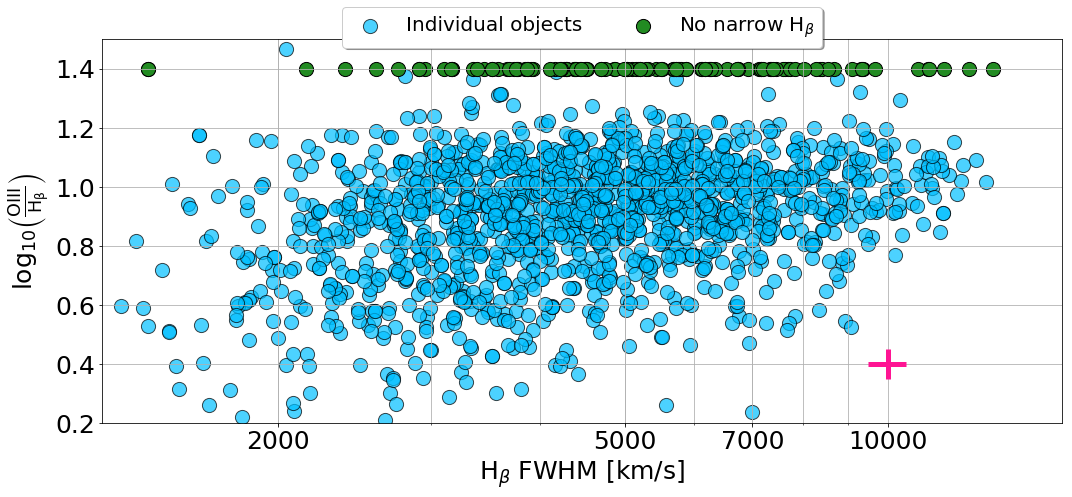

In [20]:
plt.figure(figsize = (15,7))

fs = 25
alpha_dots = 0.7

x = fwhm
y = log_line_ratio
plt.scatter(x, y, color = 'deepskyblue', s= 200, alpha = alpha_dots, label=r'Individual objects', edgecolors='k')



x = fwhm_nd
y = log_line_ratio_nd
plt.scatter(x, y,alpha = 1,  s= 200, label=r'No narrow H$_{\beta}$', color = 'forestgreen', edgecolors='k')



yerr = numpy.array([0.05, 0.05]).reshape(-1,1)
xerr = numpy.array([500, 500]).reshape(-1,1)
plt.errorbar(10000, 0.4, yerr=yerr, xerr= xerr,lw = 5, color = 'deeppink')


#plt.legend(fontsize = 15)
plt.legend(loc='upper center', bbox_to_anchor=(0.2, 1., 0.6, 0.11), 
          ncol=4, fancybox=True, shadow=True, fontsize = fs - 5)
plt.xlabel(r'H$_{\beta}$ FWHM [km/s]', fontsize = fs)
plt.ylabel(r'$\log_{10}\left(\frac{\rm{O III}}{{\rm H}_{\beta}}\right)$', fontsize = fs)

xlim = (10**3.1, 10**4.2)
#plt.hlines(y = 0.6, xmin = xlim[0], xmax = xlim[1], color = 'crimson', lw = 5)
plt.xlim(xlim)
plt.ylim([0.2,1.5])
plt.xscale('log')
plt.grid(which='both')
xticks = [2000, 5000, 7000, 10000]
plt.xticks(xticks, xticks,fontsize = fs)

plt.yticks(fontsize = fs)
plt.tight_layout()
plt.show()     